# EDA

In [114]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import pandas as pd

In [7]:
root_path="C:/Users/Palaash.HPZ/Downloads/fashion_products/images"
image_folder=os.listdir(root_path)
len(image_folder)

44441

array([30663,  8462, 10311, 38453, 21364, 38962,  9555, 16760, 25956])

In [32]:
random_nums=np.random.randint(1,len(image_folder),9)
random_nums

array([24727, 44428, 30527, 29294, 12933, 25831, 38727, 32212, 43391])

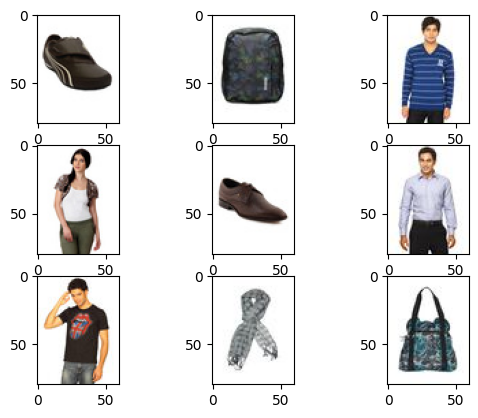

In [39]:
random_nums=np.random.randint(1,len(image_folder),9)

i=0
for index in random_nums:
    image_file=image_folder[index]
    image_file=os.path.join(root_path,image_file)
    image=Image.open(image_file)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    i+=1
    
plt.show()

In [47]:
csv_path="C:/Users/Palaash.HPZ/Downloads/fashion_products/styles.csv"
csv_file=pd.read_csv(csv_path,on_bad_lines="skip")

In [48]:
csv_file.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [49]:
csv_file.tail()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume
44423,51623,Women,Accessories,Watches,Watches,Pink,Winter,2016.0,Casual,Fossil Women Pink Dial Chronograph Watch ES3050


In [50]:
csv_file.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [60]:
from pprint import pprint

for col in csv_file.columns[1:-1]:
    print(f"len of {col}.unique(): {len(csv_file[col].unique())}")
    print(f"{col}.unique(): {csv_file[col].unique()}")
    print("\n")
    
# do classification on masterCategory

len of gender.unique(): 5
gender.unique(): ['Men' 'Women' 'Boys' 'Girls' 'Unisex']


len of masterCategory.unique(): 7
masterCategory.unique(): ['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']


len of subCategory.unique(): 45
subCategory.unique(): ['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']


len of articleType.unique(): 143
articleType.unique(): ['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 

In [64]:
#find distribution of images in masterCategory
unique_masterCats=csv_file["masterCategory"].unique()
for cat in unique_masterCats:
    l=len(csv_file[csv_file["masterCategory"]==cat])
    print(f"num of images for {cat}: {l}")

num of images for Apparel: 21397
num of images for Accessories: 11274
num of images for Footwear: 9219
num of images for Personal Care: 2403
num of images for Free Items: 105
num of images for Sporting Goods: 25
num of images for Home: 1


so drop Free Items, Sporting Goods, Home, possible to drop Personal Care also but lets just include and see

In [72]:
cols_to_use=
count=0
for col in cols_to_use:
    l=len(csv_file[csv_file["masterCategory"]==col])
    print(f"num of images for {col}: {l}")
    count+=l
   
print("\n")
print(f"total count: {count}")

num of images for Apparel: 21397
num of images for Accessories: 11274
num of images for Footwear: 9219
num of images for Personal Care: 2403


total count: 44293


In [111]:
image_ids=[int(x.split(".")[0]) for x in image_folder]

In [93]:
# checks all labels in csv is in image_ids

from tqdm import tqdm

missing_images=[]
for col in cols_to_use:
    print(f"checking {col} now")
    df=csv_file[csv_file["masterCategory"]==col]
    ids_to_check=df["id"].unique()
    for id_ in tqdm(ids_to_check):
        if id_ in image_ids:
            continue
        else:
            missing_images.append((col,id_))
            print(col,id_)

checking Apparel now


 15%|███████████▌                                                               | 3303/21397 [00:02<00:15, 1168.68it/s]

Apparel 39403


 38%|████████████████████████████▍                                              | 8120/21397 [00:07<00:11, 1168.56it/s]

Apparel 39410


 73%|██████████████████████████████████████████████████████▏                   | 15677/21397 [00:13<00:05, 1103.62it/s]

Apparel 39401


 83%|█████████████████████████████████████████████████████████████▎            | 17731/21397 [00:15<00:03, 1195.29it/s]

Apparel 39425


 91%|███████████████████████████████████████████████████████████████████▍      | 19503/21397 [00:17<00:01, 1085.81it/s]

Apparel 12347


100%|██████████████████████████████████████████████████████████████████████████| 21397/21397 [00:18<00:00, 1132.19it/s]


checking Accessories now


100%|██████████████████████████████████████████████████████████████████████████| 11274/11274 [00:10<00:00, 1058.89it/s]


checking Footwear now


100%|████████████████████████████████████████████████████████████████████████████| 9219/9219 [00:08<00:00, 1101.90it/s]


checking Personal Care now


100%|█████████████████████████████████████████████████████████████████████████████| 2403/2403 [00:03<00:00, 764.85it/s]


In [112]:
missing_images

[('Apparel', 39403),
 ('Apparel', 39410),
 ('Apparel', 39401),
 ('Apparel', 39425),
 ('Apparel', 12347)]

In [99]:
all_csv_ids=[]
for col in cols_to_use:
    df=csv_file[csv_file["masterCategory"]==col]
    for id_ in df["id"].unique():
        all_csv_ids.append(id_)
        
len(all_csv_ids)

44293

In [104]:
# check that all ids of images actually in image folder are in all_csv_ids

images_with_missing_labels=[]
for id_ in image_ids:
    if id_ in all_csv_ids:
        continue
    else:
        images_with_missing_labels.append(id_)
        print(id_)

10595
11212
13670
15349
1550
1551
1552
1553
15658
1626
1627
1628
16937
16943
18434
23100
23101
23103
23107
23108
23109
23110
23111
23112
23114
23115
23116
23117
23118
23124
23127
23482
2354
2355
2356
25088
25140
28347
28353
28365
28367
28422
29448
29455
29461
29975
29981
29982
29983
29985
29990
30029
30084
31828
33637
3413
3418
3428
36346
36763
36764
36777
37701
38324
38437
39031
4007
4008
4009
4010
4011
4012
4013
40826
42828
42829
42830
43285
43286
43294
43540
44065
44962
44963
44964
44965
44966
44968
44969
44975
44992
45004
45279
45301
45824
45894
45928
47341
48331
4854
49696
49706
49717
49718
49737
49747
50234
50306
51073
51075
51077
51078
51079
51081
51084
51088
51090
51091
51092
51108
51115
51118
51119
51124
51126
51135
52676
53566
53567
53568
53579
53591
53592
53596
53598
53599
53617
53618
53619
53623
53627
54967
54968
54969
54970
57264
57457
57600
59768
8422
8426
8427
8934


In [113]:
len(images_with_missing_labels)

153

# project start

imports
dataset class
define transforms for train val test
initialise train val test data and dataloader
plot images to visualise
create model
loss and optimizers
def get_accuracy function and initialise device and model.to(device)
training and validation loops
plot results of train and val logs for loss and acc
make predictions on test, only need outputs=forward pass and predictions

In [366]:
#imports

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader,random_split

from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import pandas as pd

In [367]:
# dataset

#since all images in 1 folder, do tfms separately. initialise full dataset, then train val test split then do tfms
class FashionDataset(Dataset):
    def __init__(self,file_names,csv_path,tfms=None):
        self.file_names=file_names
        self.csv_path=csv_path
        self.tfms=tfms
            
        self.df=pd.read_csv(self.csv_path,on_bad_lines="skip")
        self.classes=["Apparel","Accessories","Footwear","Personal Care"] # from EDA
        self.class_encoder={col:i for (i,col) in enumerate(cols_to_use)}
        self.class_decoder={v:k for k,v in self.class_encoder.items()}
        
    def __len__(self):
        return len(self.file_names)
    
    def __getitem__(self,i):
        image_file=self.file_names[i]
        image_id=int(image_file.split("\\")[-1].split(".")[0])
        
        X=Image.open(image_file)
        X=X.convert("RGB")
        if self.tfms:
            X=self.tfms(X)
            
        class_=self.df[self.df["id"]==image_id].iloc[0,2]
        y=self.class_encoder[class_]
        
        return X,y 

In [368]:
# define transforms

img_dim=60
mean=np.array([0.5,0.5,0.5])
std=np.array([0.5,0.5,0.5])

def train_transforms():
    t=transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((img_dim,img_dim)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(90),
        transforms.Normalize(mean=mean,std=std)
    ])
    return t
    
def val_transforms():
    t=transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((img_dim,img_dim)),
        transforms.Normalize(mean=mean,std=std)
    ])
    return t

In [369]:
# create list of all images since all the images are in 1 folder and cant be separated in dataset class by adding "train" "val"
root_path="C:/Users/Palaash.HPZ/Downloads/fashion_products/images"
assert os.path.exists(root_path)

file_names=os.listdir(root_path)
print(len(file_names))
# remove the images in image folder that dont have corresponding labels in csv files
for l in images_with_missing_labels:
    element=str(l)+".jpg"
    file_names.remove(element)

print(len(file_names))

file_names=[os.path.join(root_path,x) for x in file_names]
file_names[0]

44441
44288


'C:/Users/Palaash.HPZ/Downloads/fashion_products/images\\10000.jpg'

In [370]:
# initialise datasets, split randomly

train_files,remaining_files=train_test_split(file_names,train_size=0.7,random_state=10)
val_files,test_files=train_test_split(remaining_files,train_size=0.67,random_state=10)

print(len(train_files),len(val_files),len(test_files))

csv_path="C:/Users/Palaash.HPZ/Downloads/fashion_products/styles.csv"
train_data=FashionDataset(train_files,csv_path,tfms=train_transforms())
val_data=FashionDataset(val_files,csv_path,tfms=val_transforms())
test_data=FashionDataset(test_files,csv_path,tfms=val_transforms())

print(train_data.__len__(),val_data.__len__(),test_data.__len__())

31001 8902 4385
31001 8902 4385


In [371]:
# initialise dataloaders

batch_size=64

train_dl=DataLoader(train_data,batch_size=batch_size,shuffle=True,drop_last=True)
val_dl=DataLoader(val_data,batch_size=batch_size,shuffle=False,drop_last=True)
test_dl=DataLoader(test_data,batch_size=batch_size,shuffle=False,drop_last=True)

C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range 

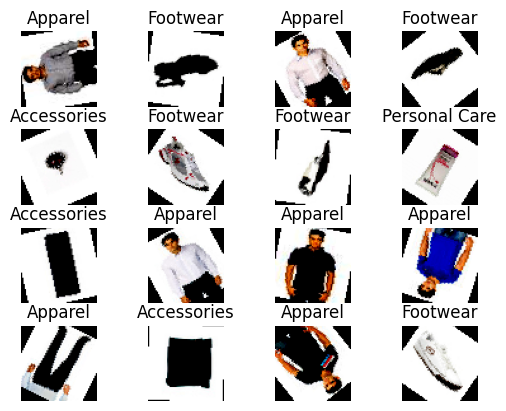

In [372]:
# plot images

class_encoder=train_data.class_encoder
class_decoder=train_data.class_decoder

ind=2 #edit this to see diff batches
j=0 #dont edit this
for batch in train_dl:
    if ind==j:
        images,labels=batch
        for i in range(16):
            img=images[i].numpy()
            img=img.transpose(1,2,0)
            plt.subplot(4,4,i+1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(class_decoder[labels[i].item()])
            
        break
    else:
        j+=1
        
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

In [373]:
# create model - use resnet18? later try resnet52 resnet 128
#store logs of the results of each model separtely so can plot them tgt in 1 plot

model1=torchvision.models.resnet18(pretrained=True)
in_ftrs=model1.fc.in_features
model1.fc=nn.Linear(in_features=in_ftrs,out_features=4) #4 classes
print(model1)
print("\n")

#test model output
print(model1(((torch.from_numpy(img)).permute(2,0,1)).reshape((1,3,60,60))))

C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [374]:
# loss and optimizers

lr=1e-4
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model1.parameters(),lr=lr)

In [375]:
# accuracy function

def get_accuracy(outputs,labels):
    _,predicted_classes=torch.max(outputs,dim=1)
    correct_predictions=(predicted_classes==labels).sum().item()
    accuracy = correct_predictions/labels.size(0) * 100
    return accuracy

sample_output=model1(((torch.from_numpy(img)).permute(2,0,1)).reshape((1,3,60,60)))
sample_label=labels[i]

# sample_output,sample_label

get_accuracy(sample_output,sample_label)

IndexError: Dimension specified as 0 but tensor has no dimensions

In [376]:
#initialise device and model.to device

device=("cuda" if torch.cuda.is_available() else "cpu")
model1=model1.to(device)

In [377]:
# training and validation loops

n_epochs=10
training_steps_to_print=1
save_path="resnet18_1.pth"

print("########## Start Training loop  ##########")
start_time=time.time()
trg_logs1={"loss":[],"acc":[]}
val_logs1={"loss":[],"acc":[]}

best_accuracy=0.0
for epoch in range(n_epochs):
    print("-"*30)
    print(f"Epoch {epoch+1}/{n_epochs}")
    running_training_loss,running_training_acc=[],[]
    running_validation_loss,running_validation_acc=[],[]
    running_validation_loss,running_validation_acc=[],[]
    
    #training loop
    for i,(images,labels) in enumerate(train_dl):
        # to device and reshape labels
#         labels=labels.reshape((-1,1)
        labels = labels.view(-1) 
        images=images.to(device)
        labels=labels.to(device)# for Crosss entropy loss dont need .float()
        # forward pass
        outputs=model1.forward(images)
        softmax_outputs=nn.Softmax(dim=1)(outputs)
        # calc loss
        trg_loss=criterion(outputs,labels)
        running_training_loss.append(trg_loss.item())
        # calc acc
        trg_acc=get_accuracy(softmax_outputs,labels)
        running_training_acc.append(trg_acc)
        # zero weights of optimizer
        optimizer.zero_grad()
        # calc grad of loss fn
        trg_loss.backward()
        # update weights
        optimizer.step()
        
        #print results
        print_divisor=1/(training_steps_to_print+1)
        if i%int(len(train_dl)*print_divisor)==0:
            if i==0 or i==len(train_dl)-1:
                continue
            else:
                print(f"Step {(i+1)}/{len(train_dl)}: training loss: {np.mean(running_training_loss):.4f}, training acc: {np.mean(running_training_acc):.4f}, time elapsed: {(time.time()-start_time):.4f}")


    #val loop
    for i,(images,labels) in enumerate(val_dl):
        # to device and reshape labels
#         labels=labels.reshape((-1,1)).float()
        labels = labels.view(-1) 
        images=images.to(device)
        labels=labels.to(device)
        # forward pass
        outputs=model1(images)
        softmax_outputs=nn.Softmax(dim=1)(outputs)
        # calc loss 
        val_loss=criterion(outputs,labels)
        running_validation_loss.append(val_loss.item())
        # calc acc
        val_acc=get_accuracy(softmax_outputs,labels)
        running_validation_acc.append(val_acc)
        
        # Check if the current model has the highest validation accuracy
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            torch.save(model1.state_dict(), save_path)
        
    #update logs
    epoch_mean_trg_loss=np.mean(running_training_loss)
    epoch_mean_trg_acc=np.mean(running_training_acc)
    epoch_mean_val_loss=np.mean(running_validation_loss)
    epoch_mean_val_acc=np.mean(running_validation_acc)
    trg_logs1["loss"].append(epoch_mean_trg_loss)
    trg_logs1["acc"].append(epoch_mean_trg_acc)
    val_logs1["loss"].append(epoch_mean_val_loss)
    val_logs1["acc"].append(epoch_mean_val_acc)
    print(f"End of epoch {epoch+1}/{n_epochs}")
    print(f"training loss: {epoch_mean_trg_loss:.4f}, training acc: {epoch_mean_trg_acc:.4f}, validation loss: {epoch_mean_val_loss:.4f}, validation acc: {epoch_mean_val_acc:.4f}, time elapsed: {(time.time()-start_time):.4f}")
    
print("-"*30)
print("########## Training loop completed ##########")
print("total time taken: ",time.time()-start_time)

########## Start Training loop  ##########
------------------------------
Epoch 1/10
Step 243/484: training loss: 0.4229, training acc: 84.7672, time elapsed: 54.0478
End of epoch 1/10
training loss: 0.3081, training acc: 89.0754, validation loss: 0.4008, validation acc: 86.5670, time elapsed: 128.5538
------------------------------
Epoch 2/10
Step 243/484: training loss: 0.1482, training acc: 94.9267, time elapsed: 181.3727
End of epoch 2/10
training loss: 0.1406, training acc: 95.3674, validation loss: 0.2566, validation acc: 91.9177, time elapsed: 254.9761
------------------------------
Epoch 3/10
Step 243/484: training loss: 0.1073, training acc: 96.4249, time elapsed: 307.6270
End of epoch 3/10
training loss: 0.1057, training acc: 96.5070, validation loss: 0.2063, validation acc: 93.2891, time elapsed: 381.0025
------------------------------
Epoch 4/10
Step 243/484: training loss: 0.0872, training acc: 96.9843, time elapsed: 432.9523
End of epoch 4/10
training loss: 0.0885, traini

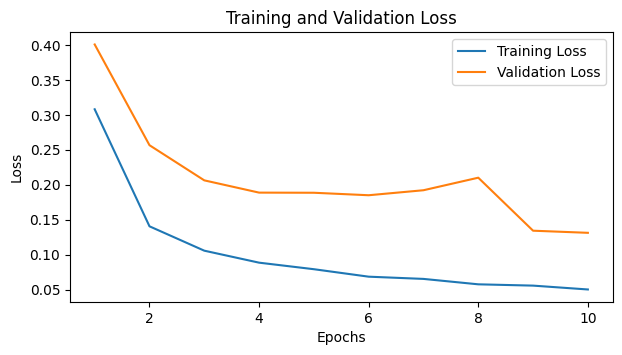

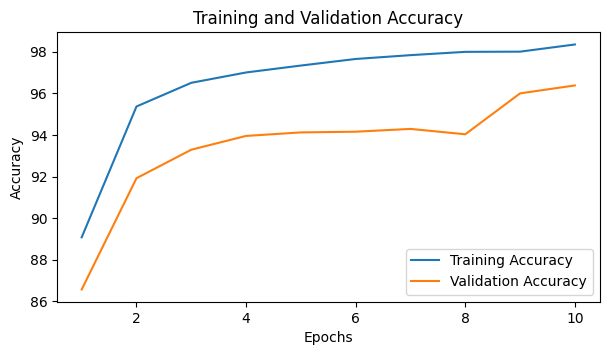

In [379]:
# plot results of train and val logs for loss and acc

# Create x-axis values (epochs)
epochs = range(1, n_epochs + 1)

# Plot the training and validation loss
plt.figure(figsize=(7, 3.5))
plt.plot(epochs, trg_logs1["loss"], label='Training Loss')
plt.plot(epochs, val_logs1["loss"], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(7, 3.5))
plt.plot(epochs, trg_logs1["acc"], label='Training Accuracy')
plt.plot(epochs, val_logs1["acc"], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


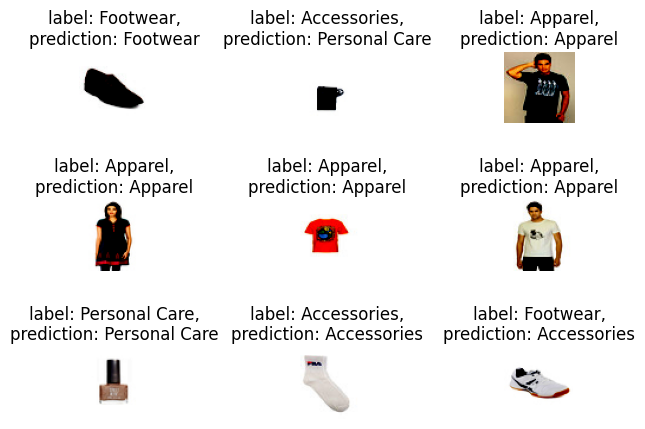

In [416]:
# make predictions on test, only need outputs=forward pass and predictions

index=1

for i,(images,labels) in enumerate(test_dl):
    # to device and reshape labels
    labels=labels.reshape((-1,1)).float()
    images=images.to(device)
    labels=labels.to(device)
    # forward pass
    outputs=model1(images)
    softmax_outputs=nn.Softmax(dim=1)(outputs)
    _, predicted_classes = torch.max(softmax_outputs, dim=1) #dim=1 check for max in a row, dim=0 check for max in a col
    predicted_class=[class_decoder[x.item()] for x in predicted_classes.cpu()]
    gt_class=[class_decoder[x.item()] for x in labels.cpu()]
    if i==index:
        break


for i in range(9):
    plt.subplot(3,3,i+1)
    img=images[i]
    img=img.cpu().numpy()
    img=img.transpose(1,2,0)
    plt.imshow(img)
    plt.title(f"label: {gt_class[i]},\nprediction: {predicted_class[i]}")
    plt.axis("off")
    
plt.subplots_adjust(wspace=2,hspace=1)
plt.show()

In [422]:
# calc overall results on test data

total_correct=0
total_num=0
for i,(images,labels) in enumerate(test_dl):
    # to device and reshape labels
    labels=labels.reshape((-1,1)).float()
    images=images.to(device)
    labels=labels.to(device)
    # forward pass
    outputs=model1(images)
    softmax_outputs=nn.Softmax(dim=1)(outputs)
    
    _,predicted_classes=torch.max(softmax_outputs,dim=1)
    correct_predictions=(predicted_classes==labels.reshape(64)).sum().item()
    total_correct+=correct_predictions
    total_num+=labels.size(0)
    final_test_acc=total_correct/total_num * 100

print(f"{total_correct} correct predictions out of total {total_num} images")
print(f"accuracy on test dataset is {final_test_acc}")

4216 correct predictions out of total 4352 images
accuracy on test dataset is 96.875


# alternative dataset class

In [2]:
#imports

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader,random_split

from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import pandas as pd

In [5]:
# dataset

#since all images in 1 folder, do tfms separately. initialise full dataset, then train val test split then do tfms
class FashionDataset(Dataset):
    def __init__(self,files_path,csv_path):
        self.files_path=files_path
        self.csv_path=csv_path
        assert os.path.exists(self.files_path)
        self.file_names=[os.path.join(self.files_path,x) for x in os.listdir(self.files_path)]
            
        self.df=pd.read_csv(self.csv_path,on_bad_lines="skip")
        self.classes=["Apparel","Accessories","Footwear","Personal Care"] # from EDA
        self.class_encoder={col:i for (i,col) in enumerate(cols_to_use)}
        self.class_decoder={v:k for k,v in self.class_encoder.items()}
        
    def __len__(self):
        return len(self.file_names)
    
    def __getitem__(self,i):
        image_file=self.file_names[i]
        image_id=int(image_file.split("\\")[-1].split(".")[0])
        
        X=Image.open(image_file)
        X=X.convert("RGB")
        
        class_=self.df[self.df["id"]==image_id].iloc[0,2]
        y=self.class_encoder[class_]
        
        return X,y 

44441
1


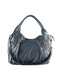

In [19]:
files_path="C:/Users/Palaash.HPZ/Downloads/fashion_products/images"
csv_path="C:/Users/Palaash.HPZ/Downloads/fashion_products/styles.csv"

cols_to_use = ["Apparel","Accessories","Footwear","Personal Care"]
full_data=FashionDataset(files_path=files_path,csv_path=csv_path)
print(full_data.__len__())
print(full_data.__getitem__(10000)[1])
full_data.__getitem__(10000)[0]

In [11]:
??train_test_split

In [ ]:
train_data,remaining_data=train_test_split(full_data,train_size=0.7,shuffle=True,random_state=10)
val_data,test_data=train_test_split(remaining_data,train_size=0.67,shuffle=True,random_state=10)

In [26]:
# define transforms

img_dim=60
mean=np.array([0.5,0.5,0.5])
std=np.array([0.5,0.5,0.5])

def train_transforms():
    t=transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((img_dim,img_dim)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(90),
        transforms.Normalize(mean=mean,std=std)
    ])
    return t
    
def val_transforms():
    t=transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((img_dim,img_dim)),
        transforms.Normalize(mean=mean,std=std)
    ])
    return t

In [31]:
class TransformedData(FashionDataset):
    def __init__(self,data,tfms=None):
        self.data=data
        self.tfms=tfms
        
    def __len__(self): return len(self.data)
        
    def __getitem__(self,i):
        X,y=self.data[i]
        if self.tfms:
            X=self.tfms(X)
        return X,y

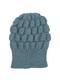

In [25]:
full_data.__getitem__(8489)[0]

In [33]:
sample_data=TransformedData(full_data,tfms=train_transforms())
sample_data.__len__()
sample_data.__getitem__(8489)[0]

C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])

In [ ]:
# now do - after splitting sklearn

train_data=TransformedData(train_data,tfms=train_transforms())
val_data=TransformedData(val_data,tfms=train_transforms())
test_data=TransformedData(test_data,tfms=train_transforms())